# Part 3 (Hands-on): Analyzing experimental data with DeerLab

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import deerlab as dl

On this exercise you will analyze an experimental 4-pulse DEER signal.  The experiment was acquired with the following experimental setup: 

| Delay | Length | Description | 
| :---: | :---: | --- |
| $\tau_1$ |  0.3μs |       First inter-pulse delay | 
| $\tau_2$ |  4.0μs  |      Second inter-pulse delay | 
| $t_0$ |  0.1μs |   Acquisition delay | 


### Hands-on #1: Loading and pre-processing experimental dipolar EPR data

Load the experimental 4-pulse DEER dipolar signal ``example_4pdeer_1.DTA`` located in the ``data`` folder of this workshop's workspace.
Pre-process the data such that the data is only real-valued and the deadtime of the experiment is accounted for. Plot the resulting pre-processed signal.


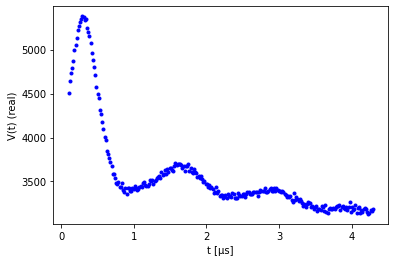

In [4]:

# The full path with filename can be directly passed to the function as well
t,Vexp = dl.deerload('../../data/example_4pdeer_1.DTA') 

# Experiment details 
t0 = 0.1 # μs 
tau1 = 0.3 # μs 
tau2 = 4.0 # μs 

# Phase correction
Vexp = dl.correctphase(Vexp)

# Acquistion delay correction
t = t - min(t) # Set the first time interval to zero 
t = t + t0 # Account for the acquistion delay 

plt.plot(t,Vexp,'b.')
plt.xlabel('t [μs]')
plt.ylabel('V(t) (real)')
plt.show()

### Hands-on #2: Constructing the 4-pulse DEER model

Construct the appropriate model of the 4-pulse DEER signal. Adjust the boundaries of the model accordingly if necessary.

In [5]:
tau1 = 0.3 # μs 
tau2 = 4.0 # μs 

# Experiment information
my4pdeer = dl.ex_4pdeer(tau1,tau2,pathways=[1])

# Define the distance range
r = np.arange(2.2,5.2,0.02)

# Construct the model
Vmodel = dl.dipolarmodel(t,r, experiment=my4pdeer) 

print(Vmodel)

Description: Dipolar signal model
Signature: (mod, reftime, conc, P)
Constants: []
Parameter Table: 
========= ======= ======= ======== ======== ====== ====================================== 
 Name      Lower   Upper    Type    Frozen   Unit   Description                           
========= ======= ======= ======== ======== ====== ====================================== 
 mod           0       1   nonlin     No            Modulation depth                      
 reftime    0.25    0.35   nonlin     No      μs    Refocusing time                       
 conc       0.01   5e+03   nonlin     No      μM    Spin concentration                    
 P             0     inf   linear     No     nm⁻¹   Non-parametric distance distribution  
========= ======= ======= ======== ======== ====== ====================================== 


### Hands-on #3: Fitting the model to the data

Fit your model to the experimental data. Check the the fit of the model to the data by plotting the results.

*Note:* Use the keyword arguments ``ftol=1e-3`` and ``regparam=0.0908`` with the ``fit`` function to speedup the computation (due to low resources on JupyterLab).

In [6]:
results = dl.fit(Vmodel,Vexp,verbose=2,ftol=1e-3,regparam=0.0908)
# Usually leave the regparam and ftol options to their defaults (here needed due to low resources)

[8-8-2022 10:43:46] Preparing the SNLLS analysis...
[8-8-2022 10:43:46] Preparations completed.
[8-8-2022 10:43:46] Non-linear least-squares routine in progress...
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.4615e+07                                    1.60e+08    
       1              2         6.4180e+06      2.82e+07       2.17e-01       2.38e+08    
       2              3         1.6323e+05      6.25e+06       1.07e+02       9.89e+06    
       3              4         6.8754e+04      9.45e+04       5.94e+00       2.78e+06    
       4              5         6.5051e+04      3.70e+03       2.16e+00       5.38e+05    
       5              6         6.4931e+04      1.19e+02       3.53e-01       1.57e+04    
       6              7         6.4931e+04      9.78e-02       1.18e-02       3.18e+01    
`ftol` termination condition is satisfied.
Function evaluations 7, initial cost 3.4615e+07, final cost 6.493

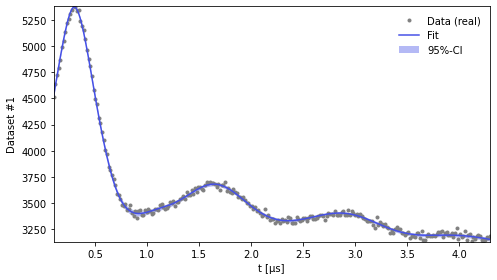

In [7]:
results.plot(axis=t,xlabel='t [μs]')
plt.show() 

### Hands-on #4: Extracting results and uncertainties

Examine the values of the fitted parameters and their uncertainties. 



In [8]:
print(results)

Goodness-of-fit: 
========= ============= ============ ======== ========== 
 Dataset   Noise level   Reduced 𝛘2    RMSD      AIC     
========= ============= ============ ======== ========== 
   #1        24.222        0.967      21.633   2990.215  
========= ============= ============ ======== ========== 
Model hyperparameters: 
 Regularization parameter  
          0.091            
Model parameters: 
=========== =================== ========================= ====== ====================================== 
 Parameter   Value               95%-Confidence interval   Unit   Description                           
=========== =================== ========================= ====== ====================================== 
 mod         0.303               (0.300,0.305)                    Modulation depth                      
 reftime     0.299               (0.298,0.301)              μs    Refocusing time                       
 conc        148.129             (143.733,152.525)          μM    Sp

Plot the fitted distribution along its 95%-confidence band. How many modes does the estimated distance distribution have, and what is the median distance? 


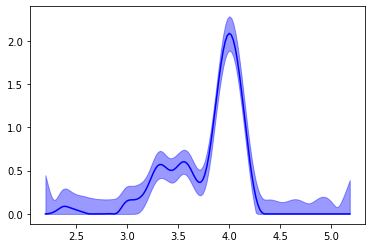

In [9]:
Pfit = results.P
Pci95 = results.PUncert.ci(95)

plt.plot(r,Pfit,'b')
plt.fill_between(r,Pci95[:,0],Pci95[:,1],color='b',alpha=0.4)
plt.show()

In [10]:
stats = dl.diststats(r,Pfit,results.PUncert,verbose=True)

-------------------------------------------------
Distribution Statistics
-------------------------------------------------
Range                    2.20-5.18 nm
Integral                 1.00
-------------------------------------------------
Location
-------------------------------------------------
Range                    2.20-5.18 nm
Mean                     3.78 (3.77,3.80) nm
Median                   3.91 (3.90,3.92) nm
Interquartile mean       3.88 (3.87,3.89) nm
Mode                     4.00 nm
-------------------------------------------------
Spread
-------------------------------------------------
Standard deviation       0.36 (0.33,0.39) nm
Mean absolute deviation  0.29 (0.27,0.30) nm
Interquartile range      0.48 (0.46,0.51) nm
Variance                 0.13 (0.11,0.15) nm²
-------------------------------------------------
Shape
-------------------------------------------------
Modality                 3
Skewness                 -1.37 (-2.32,-0.42) 
Kurtosis                 -